In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.geodesic as cgeo
from pyproj import Geod
from geographiclib.geodesic import Geodesic
from matplotlib.widgets import Slider

In [2]:
df=pd.read_csv('Titanic.csv')
print(df.head())

   PassengerId Survived  Pclass     Sex   Age  SibSp  ParCh     Fare Embarked
0            1       No       3    male  22.0      1      0   7.2500        S
1            2      Yes       1  female  38.0      1      0  71.2833        C
2            3      Yes       3  female  26.0      0      0   7.9250        S
3            4      Yes       1  female  35.0      1      0  53.1000        S
4            5       No       3    male  35.0      0      0   8.0500        S


In [3]:
#Get basic information about the dataframe
print('\nDataframe Info:')
print(df.describe())


Dataframe Info:
       PassengerId      Pclass         Age       SibSp       ParCh        Fare
count   891.000000  891.000000  887.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.470316    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.121427    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.250000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [7]:
#Numerical Summaries with Pandas
#Summary statistics for the numerical columns
print(df.describe().round(2))

print('\nGROUPED SUMMARIES')
#Grouped summaries
print(df.groupby('Survived')['Pclass'].mean())
print(df.groupby('Survived')['Sex'].value_counts())
print(df.groupby('Survived')['Age'].mean())

print('\nCOUNT SUMMARIES')
#Count of people cohort
print(df['Survived'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts())
print(df['Sex'].value_counts())

print('\nCROSS-TABULATIONS')
#Cross-Tab between Gender and Job Grade
print(pd.crosstab(df['Sex'], df['Survived']))
print(pd.crosstab(df['Pclass'], df['Survived']))
print(pd.crosstab(df['Pclass'], df['Sex']))
print(pd.crosstab(df['Embarked'], df['Pclass']))

       PassengerId  Pclass     Age   SibSp   ParCh    Fare
count       891.00  891.00  887.00  891.00  891.00  891.00
mean        446.00    2.31   29.47    0.52    0.38   32.20
std         257.35    0.84   14.12    1.10    0.81   49.69
min           1.00    1.00    0.42    0.00    0.00    0.00
25%         223.50    2.00   20.25    0.00    0.00    7.91
50%         446.00    3.00   28.00    0.00    0.00   14.45
75%         668.50    3.00   38.00    1.00    0.00   31.00
max         891.00    3.00   80.00    8.00    6.00  512.33

GROUPED SUMMARIES
Survived
No     2.531876
Yes    1.950292
Name: Pclass, dtype: float64
Survived  Sex   
No        male      468
          female     81
Yes       female    233
          male      109
Name: count, dtype: int64
Survived
No     30.136697
Yes    28.408392
Name: Age, dtype: float64

COUNT SUMMARIES
Survived
No     549
Yes    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Na


Survival


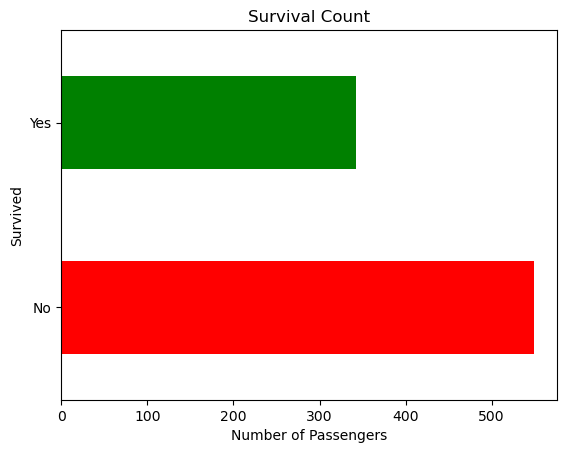

In [9]:
#Bar chart: Survival
print('\nSurvival')
df['Survived'].value_counts().plot(kind='barh', color=['red', 'green'])
plt.title('Survival Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Survived')
plt.yticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [11]:
#Map Embarkation Points and Passenger Counts

#Map port codes to city names and coordinates
port_locations = {
    'C': {'city': 'Cherbourg', 'lat':49.6333, 'lon':-1.6167},
    'Q': {'city': 'Queenstown', 'lat':51.8490, 'lon':-8.2944},
    'S': {'city': 'Southampton', 'lat':50.9097, 'lon':-1.4043},
    'X': {'city': 'Titanic Sinking', 'lat':41.7325, 'lon':-49.9469},
    'O': {'city': 'New York City', 'lat':40.7128, 'lon':-74.0060} 
}
# Approximate passengers by embarkation point from Titanic data
embarked_counts = {
    'C': 85,
    'Q': 77,
    'S': 644
}

#Total survivors (for line weight to NYC)
total_survivors = 705

#Total fatalities
total_fatalities = 1500

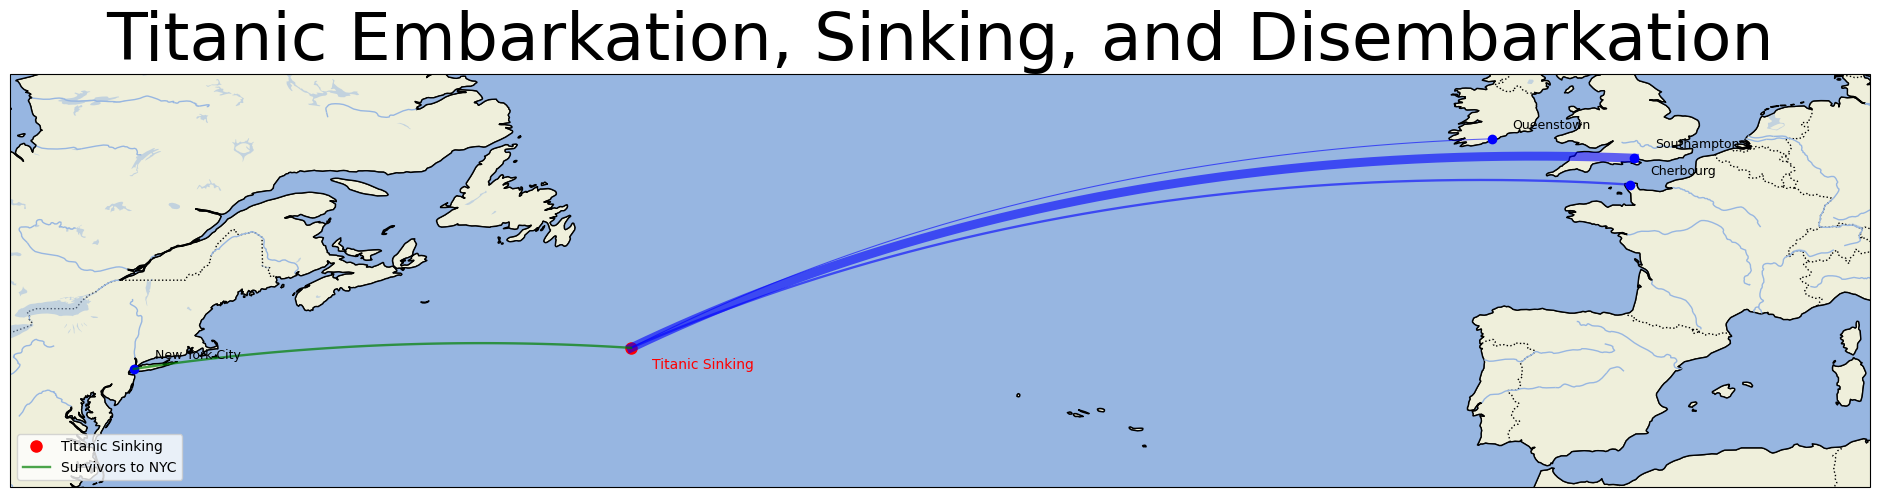

In [13]:
# Set up geodesic calculator
geod = Geod(ellps='WGS84')

# Define port coordinates (double check lat/lon are correct!)
port_locations = {
    'C': {'city': 'Cherbourg',    'lat': 49.6333, 'lon':  -1.6167},
    'Q': {'city': 'Queenstown',   'lat': 51.8490, 'lon':  -8.2944},
    'S': {'city': 'Southampton',  'lat': 50.9097, 'lon':  -1.4043},
    'X': {'city': 'Titanic Sinking', 'lat': 41.7325, 'lon': -49.9469},  # Corrected sinking coordinates
    'O': {'city': 'New York City','lat': 40.7128, 'lon': -74.0060}
}

# Calculate embarkation counts from your dataframe `df`
embarked_counts = df['Embarked'].value_counts().to_dict()
total_survivors = df[df['Survived'] == 'Yes'].shape[0]  # or whatever column format

# ------------------- Plotting Map -------------------
plt.figure(figsize=(24, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 10, 35, 55], crs=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Plot locations
for code, info in port_locations.items():
    label = info['city']
    lat, lon = info['lat'], info['lon']
    
    if code == 'X':  # Sinking site
        ax.plot(lon, lat, 'ro', markersize=8, label=label)
        ax.text(lon + 1, lat - 1, label, fontsize=10, color='red')
    else:
        ax.plot(lon, lat, 'bo', markersize=6)
        ax.text(lon + 1, lat + 0.5, label, fontsize=9)

# ------------------- Great-Circle Arcs -------------------
sinking_coords = (port_locations['X']['lon'], port_locations['X']['lat'])

for code, count in embarked_counts.items():
    port = port_locations[code]
    start = (port['lon'], port['lat'])

    # Generate great-circle points to sinking site
    points = geod.npts(start[0], start[1], sinking_coords[0], sinking_coords[1], 50)
    lons = [start[0]] + [p[0] for p in points] + [sinking_coords[0]]
    lats = [start[1]] + [p[1] for p in points] + [sinking_coords[1]]

    ax.plot(lons, lats, color='blue', linewidth=count / 100, alpha=0.6)

# ------------------- Line from Sinking to NYC -------------------
nyc_coords = (port_locations['O']['lon'], port_locations['O']['lat'])
points = geod.npts(sinking_coords[0], sinking_coords[1], nyc_coords[0], nyc_coords[1], 50)
lons = [sinking_coords[0]] + [p[0] for p in points] + [nyc_coords[0]]
lats = [sinking_coords[1]] + [p[1] for p in points] + [nyc_coords[1]]

ax.plot(lons, lats, color='green', linewidth=total_survivors / 200, alpha=0.7, label='Survivors to NYC')

# ------------------- Final Touches -------------------
plt.title('Titanic Embarkation, Sinking, and Disembarkation', fontsize=48)
plt.legend(loc='lower left')
plt.grid(True)
plt.show()